# Analysis - SGD Variants

## Packages and Data Set

### Import Packages

In [1]:
# package imports for numeric computing
import numpy as np
import random as rnd
# Inputting latex
from IPython.display import display, Math, Latex
# package import for graphing
import matplotlib.pyplot as plt
%matplotlib inline
# package for timing
import time

### Regression Function

In [2]:
def y(x,weights):
    yVector = [weights[i]*x**i for i in range(0,len(weights))]
    return sum(yVector)
print("The polynomial regression function we're using is defined:")
display(Math(r'f(x,w) = \sum_{i=0}^{n}w_{i}x^i'))

The polynomial regression function we're using is defined:


<IPython.core.display.Math object>

### Loss Functions

In [3]:
# Basic cost funct.
# divided through by training data length the normalize
def loss(w,trainData):
    cost = 0
    for i in range(0,len(trainData)):
        cost += (y(trainData[i][0],w) - trainData[i][1])**2 
    return cost/(2*len(trainData))

# Cost funct. with weight decay
# remember to add ld to main funct. when using
def lossWD(w, trainData,ld):
    cost = 0
    for i in range(0,len(trainData)):
        cost += (y(trainData[i][0],w) - trainData[i][1])**2 + (ld/2)*abs(sum(w))**2
    return cost/(2*len(trainData))

print( "The two loss functions we will look at are:")
display(Math(r'loss(x) = \frac{1}{2m}\bigg(\sum_{i=1}^{m}\big(f(x_i,W) - y_i\big)^2\bigg)'))
display(Math(r'lossWD(x) = \frac{1}{2m}\bigg(\sum_{i=1}^{m}\big(f(x_i,W) - y_i\big)^2\bigg)'\
             + r'frac{\lambda}{2}||W||^2'))
print(" lossWD(x) includes a weight decay function used for regularisation of the model")

The two loss functions we will look at are:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

 lossWD(x) includes a weight decay function used for regularisation of the model


## Gradient Descent Functions

### Base Gradient Descent

In [4]:
def gradDescent(weighting,trainData,learnRate):
    wGrad = np.zeros(len(weighting))
    N = len(trainData)
    for point in range(0, N):   
        for i in range(0, len(weighting)):
            wGrad[i] += trainData[point][0]**i*(y(trainData[point][0],weighting) \
            - trainData[point][1]) 
    w_ = [origW - learnRate*(float(1)/float(N))*wIter for origW, wIter \
          in zip(weighting, wGrad)]
    return w_

print( "The gradient descent algorithm for this polynomial learner is:")
display(Math(r'w_i = w_i-\frac{\alpha}{n}\sum_{j=1}^{n}\big((f(x_j,W)-y_j)x_j^i'))

The gradient descent algorithm for this polynomial learner is:


<IPython.core.display.Math object>

### Gradient Descent w. loss weight decay

In [5]:
def gradDescentWD(weighting,trainData,learnRate,ld):
    wGrad = np.zeros(len(weighting))
    N = len(trainData)
    for point in range(0, N):   
        for i in range(0, len(weighting)):
            wGrad[i] += trainData[point][0]**i*(y(trainData[point][0],weighting) \
            - trainData[point][1]) - ld*abs(weighting[i])
    w_ = [origW - learnRate*(float(1)/float(N))*wIter for origW, wIter \
          in zip(weighting, wGrad)]
    return w_

print( "The gradient descent algorithm for this polynomial learner is:")
display(Math(r'w_i = w_i-\frac{\alpha}{n}\sum_{j=1}^{n}\big((f(x_j,W)-y_j)x_j^i - ' \
             + r'\alpha |W|\big)'))

The gradient descent algorithm for this polynomial learner is:


<IPython.core.display.Math object>

### Gradient Descent w. Brownian Motion

In [6]:
def gradDescentBrownian(weighting,trainData,learnRate,sigma):
    wGrad = np.zeros(len(weighting))
    N = len(trainData)
    for point in range(0, N):   
        for i in range(0, len(weighting)):
            wGrad[i] += trainData[point][0]**i*(y(trainData[point][0],weighting) \
            - trainData[point][1]) 
    w_ = [origW - learnRate*(float(1)/float(N))*wIter + np.random.normal(0,sigma) \
          for origW, wIter in zip(weighting, wGrad)]
    return w_

print( "The gradient descent algorithm for this polynomial learner is:")
display(Math(r'w_i = w_i-\frac{\alpha}{n}\sum_{j=1}^{n}\big(f(x_j,W)-y_j\big)x_j^i + \sigma'))
print( "where sigma is a random brownian motion")

The gradient descent algorithm for this polynomial learner is:


<IPython.core.display.Math object>

where sigma is a random brownian motion


### Gradient Descent w. Momentum

In [7]:
def gradDescentMomentum(weighting,trainData,learnRate,eps,vList):
    wGrad = np.zeros(len(weighting))
    N = len(trainData);
    for point in range(0, N):   
        for i in range(0, len(weighting)):
            wGrad[i] += trainData[point][0]**i*(y(trainData[point][0],weighting) \
            - trainData[point][1])*(float(1)/float(N)) 
    vList = [eps*vList[i] + learnRate*wGrad[i] for i in range(len(weighting))] 
    w_ = [origW - velocity for origW, velocity in zip(weighting, vList)]
    return w_, vList

print( "The gradient descent algorithm with momentum for this polynomial learner is:")
display(Math(r'v_i = \epsilon v_i - \frac{1-\epsilon}{n}\sum_{j=1}^{n}'\
             +r'\big(f(x_j,W)-y_j\big)x_j^i'))
display(Math(r'w_i = w_i + \alpha v_i'))

The gradient descent algorithm with momentum for this polynomial learner is:


<IPython.core.display.Math object>

<IPython.core.display.Math object>


## Training

### Batch Gradient Descent

In [8]:
# Iteration Function
# optimise_() returns an array of the weights and error at n/4, n/2, 3n/4, n iterations."
def optimiseGradDesc(weighting, trainData, learnRate, ld, maxTime):
    TOL = 10e10; h = []; n = 1; iterations = 0
    optList = []; optCond = [10e10, None, None]
    startTime = time.time()
    while time.time() < (startTime+maxTime):
        weighting = gradDescent(weighting, trainData, learnRate)
        TOL = loss(weighting, trainData); iterations += 1
        elapsedTime = time.time() - startTime
        if elapsedTime > (n*maxTime)/5:
            n += 1
            optList += [[elapsedTime, TOL, weighting]]
            print("At " + str(round(elapsedTime,4)) +" seconds and "+str(iterations) + \
                  " iterations, the TOL is " + str(round(TOL,6)))
        if TOL < optCond[0]:
            optCond = [TOL, iterations, weighting]
        h += [[elapsedTime, TOL]]
    optList += [optCond]
    print("Optimal optimisation at n = "+str(optList[-1][1])+" of TOL: "\
          + str(round(optList[-1][0],6)))
    return optList, h

### Base Stochastic Gradient Descent

In [9]:
def optimiseSGD(weighting,trainData,learnRate,Type,param,batchSize,maxTime):
    iterations = 0; TOL = 10e10; n = 10e10; h = []; m = 1;
    optList = []; optCond = [10e10, None, None]
    startTime = time.time()
    while time.time() < (startTime + maxTime):
        if (n + batchSize - len(trainData)) > 0:
            trainDataIndex = range(len(trainData))
            rnd.shuffle(trainDataIndex)
            trainData = [trainData[i] for i in trainDataIndex]
            n = 0    
        if Type == "Base":
            weighting = gradDescent(weighting, trainData[n:n+batchSize], learnRate)
        elif Type == "WD":
             weighting = gradDescentWD(weighting,trainData[n:n+batchSize],learnRate,param)
        elif Type == "Brownian":
            weighting = gradDescentBrownian(weighting,trainData[n:n+batchSize],\
                                            learnRate,param)
        TOL = loss(weighting, trainData)
        iterations += 1; n += batchSize
        elapsedTime = time.time() - startTime
        if elapsedTime > (m*maxTime)/5:
            m += 1
            optList += [[elapsedTime, TOL, weighting]]
            print("At " + str(round(elapsedTime,4)) +" seconds and "+str(iterations) + \
                  " iterations, the TOL is " + str(round(TOL,6))) 
        if TOL < optCond[0]:
            optCond = [TOL, iterations, weighting]
        h += [[elapsedTime, TOL]]
    optList += [optCond]
    print("Optimal optimisation at n = "+str(optList[-1][1])+" of TOL: "\
          +str(round(optList[-1][0],6)))
    return optList, h

In [10]:
def optimiseSGD_M(weighting,trainData,learnRate,eps,batchSize,maxTime):
    iterations = 0; TOL = 10e10; n = 10e10; h = []; m = 1;
    optList = []; optCond = [10e10, None,None]
    startTime = time.time()
    # Setting base velocity as random numbers, -1 <= v_i <= 1
    velocity = [2*rnd.random()-1 for _ in range(len(weighting))]
    while time.time() < (startTime + maxTime):
        if (n + batchSize - len(trainData)) > 0:
            trainDataIndex = range(len(trainData))
            rnd.shuffle(trainDataIndex)
            trainData = [trainData[i] for i in trainDataIndex]
            n = 0    
        weighting, velocity = gradDescentMomentum(weighting,trainData[n:n+batchSize], \
                                            learnRate,eps,velocity)
        TOL = loss(weighting, trainData)
        iterations += 1; n += batchSize
        elapsedTime = time.time() - startTime
        if elapsedTime > (m*maxTime)/5:
            m += 1
            optList += [[elapsedTime, TOL, weighting]]
            print("At " + str(round(elapsedTime,4)) +" seconds and "+str(iterations) + \
                  " iterations, the TOL is " + str(round(TOL,6))) 
        if TOL < optCond[0]:
            optCond = [TOL, iterations, weighting]
        h += [[elapsedTime, TOL]]
    optList += [optCond]
    print("Optimal optimisation at n = "+str(optList[-1][1])+" of TOL: "\
          + str(round(optList[-1][0],6)))
    return optList, h

## Analysis

### Varying Stochastic Gradient Descent Varient

In [15]:
def optMethodAnalysis(underlyingFunct, bounds, trainSetSize, batchSize, randParam, maxTime):
    # ---- Hyperparam. ----
    wDConst = 0.001 # Weight Decay Constant
    sigma = 0.1 # Brownian Motion Sigma
    eps = 0.5 # Momentum epsilon decay 
    learnRate = 1
    # ---------------------
    X = [bounds[0] + (bounds[1]-bounds[0])*rnd.random() \
         for r in xrange(trainSetSize)]
    Y = [underlyingFunct(x) + randParam[0]*np.random.normal(0,randParam[1]) \
         for x in X]
    trainData = np.column_stack((X,Y))
    X_ = [bounds[0] + (bounds[1]-bounds[0])*rnd.random() \
         for r in xrange(trainSetSize)]
    Y_ = [underlyingFunct(x) + randParam[0]*np.random.normal(0,randParam[1]) \
         for x in X_]
    testData = np.column_stack((X_,Y_))
    print("Training Data Plot")
    plt.plot(X,Y,"o")
    plt.xlabel("x Vals"); plt.ylabel("y Vals")
    plt.show()
    #cond = raw_input("happy with the underlying function? ")
    #if cond == "yes" or cond == "Yes":
    if 1 == 1:
        initWeights = [2*rnd.random()-1 for _ in range(10)]        
        print("___Base Stochastic Gradient Descent___")
        print("Plot colour: red")
        start_time1 = time.time()
        optBatchList, batchVals = optimiseSGD(initWeights, trainData, learnRate,\
                                            "Base", None, batchSize, maxTime)
        controlTrainLoss = optBatchList[-1][0]
        controlTestLoss = loss(optBatchList[-1][2],testData)
        timeVals = [batchVals[i][0] for i in range(len(batchVals))]
        TOLVals = [batchVals[i][1] for i in range(len(batchVals))]
        plt.plot(timeVals, TOLVals, 'r')
        print("%s seconds to train" % (round(time.time() - start_time1,4))); print("")
        
        print("___SGD w. Weight Decay___")
        print("Plot colour: blue")
        print("We are using a weight decay hyperparam lamda = " + str(wDConst))
        start_time1 = time.time()
        optBatchList, batchVals = optimiseSGD(initWeights, trainData, learnRate,\
                                            "WD", wDConst, batchSize, maxTime)
        timeVals = [batchVals[i][0] for i in range(len(batchVals))]
        TOLVals = [batchVals[i][1] for i in range(len(batchVals))]
        plt.plot(timeVals, TOLVals, 'b')
        percentIncrease = (controlTrainLoss - optBatchList[-1][0] )/controlTrainLoss
        print("The % Training TOL increase: "+str(round(100*percentIncrease,4))+"%")
        testLoss = loss(optBatchList[-1][2],testData)
        print("Test set TOL is: " + str(round(testLoss,6)))
        tPercentIncrease = (controlTestLoss - testLoss)/controlTestLoss
        print("The % Test TOL increase: "+str(round(100*tPercentIncrease,4))+"%")
        print("%s seconds to train" % (round(time.time() - start_time1,4))); print("") 
        print("___SGD w. Brownian Motion___")
        print("Plot colour: yellow")
        print("We are using a sigma hyperparam lamda = " + str(sigma))
        start_time1 = time.time()
        optBatchList, batchVals = optimiseSGD(initWeights, trainData, learnRate,\
                                            "Brownian", sigma, batchSize, maxTime)
        timeVals = [batchVals[i][0] for i in range(len(batchVals))]
        TOLVals = [batchVals[i][1] for i in range(len(batchVals))]
        plt.plot(timeVals, TOLVals, 'y')
        percentIncrease = (controlTrainLoss - optBatchList[-1][0] )/controlTrainLoss
        print("The % Training TOL increase: "+str(round(100*percentIncrease,4))+"%")
        testLoss = loss(optBatchList[-1][2],testData)
        print("Test set TOL is: " + str(round(testLoss,6)))
        tPercentIncrease = (controlTestLoss - testLoss)/controlTestLoss
        print("The % Test TOL increase: "+str(round(100*tPercentIncrease,4))+"%")
        print("%s seconds to train" % (round(time.time() - start_time1,4))); print("")

        print("___SGD w. Momentum___")
        print("Plot colour: black")
        print("We are using a epsilon decay hyperparam lamda = " + str(eps))
        start_time1 = time.time()
        optBatchList, batchVals = optimiseSGD_M(initWeights, trainData, learnRate,\
                                                eps, batchSize, maxTime)
        timeVals = [batchVals[i][0] for i in range(len(batchVals))]
        TOLVals = [batchVals[i][1] for i in range(len(batchVals))]
        plt.plot(timeVals, TOLVals, 'b')
        percentIncrease = (controlTrainLoss - optBatchList[-1][0] )/controlTrainLoss
        print("The % Training TOL increase: "+str(round(100*percentIncrease,4))+"%")
        testLoss = loss(optBatchList[-1][2],testData)
        print("Test set TOL is: " + str(round(testLoss,6)))
        tPercentIncrease = (controlTestLoss - testLoss)/controlTestLoss
        print("The % Test TOL increase: "+str(round(100*tPercentIncrease,4))+"%")
        print("%s seconds to train" % (round(time.time() - start_time1,4))); print("")
        plt.xlabel("Time Elapsed")
        plt.ylabel("TOL")
        plt.show()

Training Data Plot


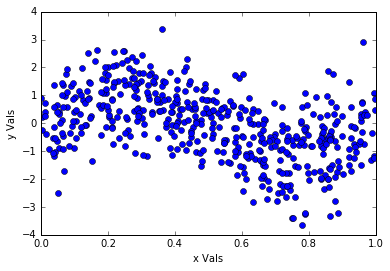

___Base Stochastic Gradient Descent___
Plot colour: red
At 4.0013 seconds and 838 iterations, the TOL is 1.613121
At 8.0011 seconds and 1660 iterations, the TOL is 0.730864
At 12.0006 seconds and 2522 iterations, the TOL is 0.593661
At 16.0011 seconds and 3425 iterations, the TOL is 24.048911
At 20.0006 seconds and 4246 iterations, the TOL is 1.619115
Optimal optimisation at n = 4043 of TOL: 0.480686
20.0548 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 4.0035 seconds and 855 iterations, the TOL is 0.506304
At 8.0011 seconds and 1743 iterations, the TOL is 0.542444
At 12.0022 seconds and 2571 iterations, the TOL is 0.625094
At 16.0007 seconds and 3398 iterations, the TOL is 1.875892
At 20.0005 seconds and 4235 iterations, the TOL is 1.150614
Optimal optimisation at n = 1750 of TOL: 0.501295
The % Training TOL increase: -4.2873%
Test set TOL is: 0.576206
The % Test TOL increase: -1.5002%
20.0089 seconds to train

__

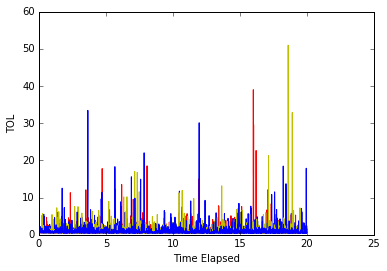

In [16]:
def f(x):
    return np.sin(2*np.pi*(x))
    #return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))

optMethodAnalysis(f, [0,1],500,10, [0.5,2],20)


Training Data Plot


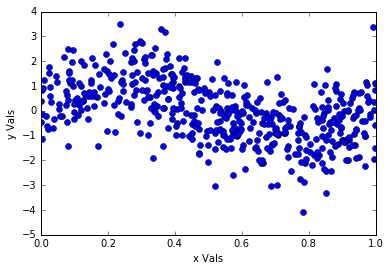

___Base Stochastic Gradient Descent___
Plot colour: red
At 12.0008 seconds and 2532 iterations, the TOL is 0.540137
At 24.0032 seconds and 5102 iterations, the TOL is 0.550816
At 36.0037 seconds and 7687 iterations, the TOL is 0.574927
At 48.0033 seconds and 10292 iterations, the TOL is 0.915126
At 60.0045 seconds and 12853 iterations, the TOL is 0.48516
Optimal optimisation at n = 11970 of TOL: 0.481247
60.0672 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 12.0005 seconds and 2516 iterations, the TOL is 0.534767
At 24.0009 seconds and 5164 iterations, the TOL is 0.582703
At 36.0038 seconds and 7688 iterations, the TOL is 2.198144
At 48.0026 seconds and 10286 iterations, the TOL is 8.255231
At 60.0009 seconds and 12912 iterations, the TOL is 521.818127
Optimal optimisation at n = 5955 of TOL: 0.498333
The % Training TOL increase: -3.5503%
Test set TOL is: 0.524153
The % Test TOL increase: -2.8033%
60.0134 seconds t

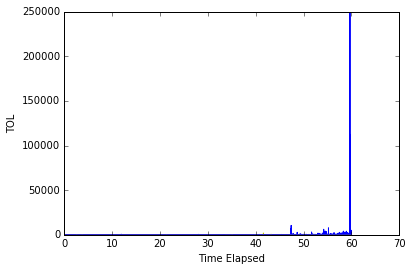

In [17]:
def f(x):
    return np.sin(2*np.pi*(x))
    #return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))

optMethodAnalysis(f, [0,1],500,10, [0.5,2],60)

Training Data Plot


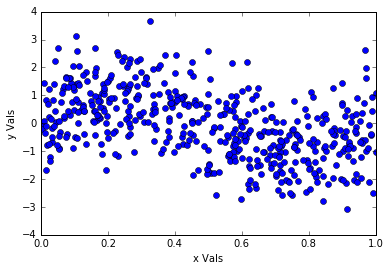

___Base Stochastic Gradient Descent___
Plot colour: red
At 36.0005 seconds and 7977 iterations, the TOL is 0.65758
At 72.0007 seconds and 16190 iterations, the TOL is 1.141893
At 108.0041 seconds and 24219 iterations, the TOL is 0.633443
At 144.0027 seconds and 30925 iterations, the TOL is 0.541637
At 180.0011 seconds and 38163 iterations, the TOL is 0.729753
Optimal optimisation at n = 36960 of TOL: 0.489145
180.086 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 36.0019 seconds and 7889 iterations, the TOL is 3.466755
At 72.0043 seconds and 15842 iterations, the TOL is 8152.510947
At 108.0041 seconds and 23657 iterations, the TOL is 215463334.643
At 144.003 seconds and 31184 iterations, the TOL is 1.70850615086e+11
At 180.0018 seconds and 39257 iterations, the TOL is 1.659954076e+15
Optimal optimisation at n = 1981 of TOL: 0.511231
The % Training TOL increase: -4.5153%
Test set TOL is: 0.518493
The % Test TOL incre

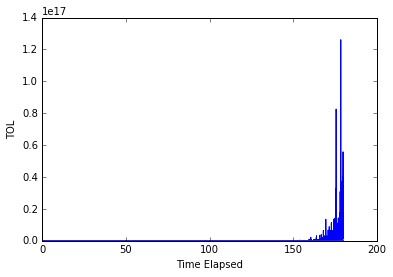

In [18]:
def f(x):
    return np.sin(2*np.pi*(x))
    #return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))

optMethodAnalysis(f, [0,1],500,10, [0.5,2],180)

Training Data Plot


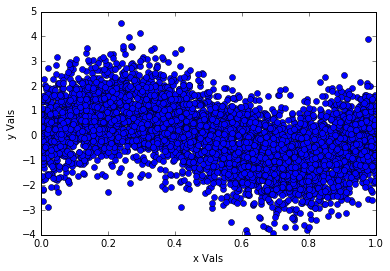

___Base Stochastic Gradient Descent___
Plot colour: red
At 4.0105 seconds and 102 iterations, the TOL is 0.599851
At 8.0262 seconds and 209 iterations, the TOL is 0.655675
At 12.0154 seconds and 316 iterations, the TOL is 0.579045
At 16.0143 seconds and 420 iterations, the TOL is 0.548063
At 20.0041 seconds and 525 iterations, the TOL is 0.559289
Optimal optimisation at n = 459 of TOL: 0.53881
20.1026 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 4.018 seconds and 108 iterations, the TOL is 5.988149
At 8.0092 seconds and 214 iterations, the TOL is 0.562043
At 12.0283 seconds and 322 iterations, the TOL is 0.652419
At 16.0297 seconds and 426 iterations, the TOL is 0.802166
At 20.025 seconds and 531 iterations, the TOL is 0.54944
Optimal optimisation at n = 446 of TOL: 0.541567
The % Training TOL increase: -0.5115%
Test set TOL is: 0.55294
The % Test TOL increase: -0.1525%
20.0702 seconds to train

___SGD w. Brownian

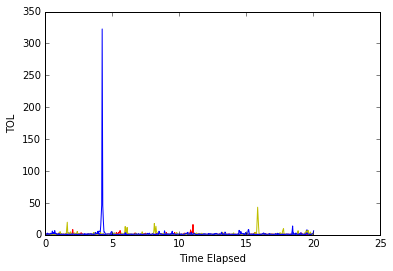

In [19]:
def f(x):
    return np.sin(2*np.pi*(x))
    #return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))

optMethodAnalysis(f, [0,1],5000,10, [0.5,2],20)

Training Data Plot


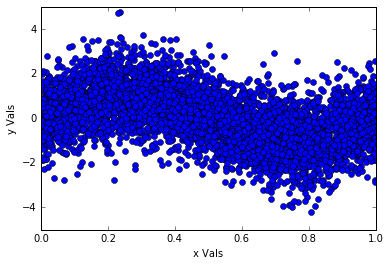

___Base Stochastic Gradient Descent___
Plot colour: red
At 12.0166 seconds and 327 iterations, the TOL is 0.62622
At 24.0095 seconds and 650 iterations, the TOL is 0.628255
At 36.0338 seconds and 976 iterations, the TOL is 1.261161
At 48.032 seconds and 1303 iterations, the TOL is 0.551813
At 60.0221 seconds and 1625 iterations, the TOL is 1.446634
Optimal optimisation at n = 1488 of TOL: 0.517658
60.1156 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 12.009 seconds and 333 iterations, the TOL is 0.55662
At 24.0195 seconds and 663 iterations, the TOL is 0.550833
At 36.0096 seconds and 987 iterations, the TOL is 1.724699
At 48.0297 seconds and 1315 iterations, the TOL is 0.644779
At 60.0233 seconds and 1635 iterations, the TOL is 31.268869
Optimal optimisation at n = 1576 of TOL: 0.52281
The % Training TOL increase: -0.9953%
Test set TOL is: 0.530462
The % Test TOL increase: -0.8861%
60.0691 seconds to train

___SGD 

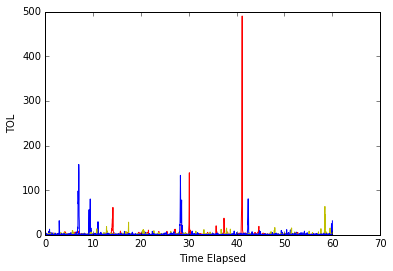

In [20]:
def f(x):
    return np.sin(2*np.pi*(x))
    #return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))

optMethodAnalysis(f, [0,1],5000,10, [0.5,2],60)

Training Data Plot


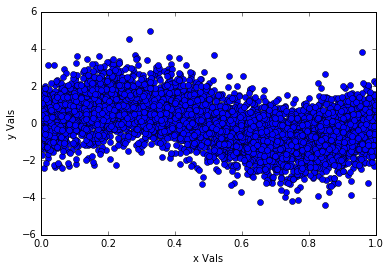

___Base Stochastic Gradient Descent___
Plot colour: red
At 36.0236 seconds and 995 iterations, the TOL is 1.131416
At 72.0018 seconds and 1982 iterations, the TOL is 0.565328
At 108.0204 seconds and 2960 iterations, the TOL is 1.764049
At 144.0117 seconds and 3884 iterations, the TOL is 0.933834
At 180.0303 seconds and 4829 iterations, the TOL is 0.613066
Optimal optimisation at n = 4503 of TOL: 0.527448
180.1275 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 36.0018 seconds and 988 iterations, the TOL is 2.477444
At 72.0023 seconds and 1977 iterations, the TOL is 0.658802
At 108.0326 seconds and 2971 iterations, the TOL is 0.825657
At 144.0249 seconds and 3959 iterations, the TOL is 0.90105
At 180.0288 seconds and 4945 iterations, the TOL is 1.798061
Optimal optimisation at n = 4675 of TOL: 0.537434
The % Training TOL increase: -1.8932%
Test set TOL is: 0.529532
The % Test TOL increase: -1.7685%
180.0756 seconds to

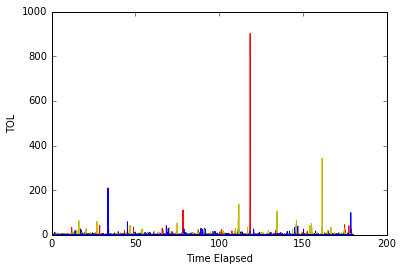

In [21]:
def f(x):
    return np.sin(2*np.pi*(x))
    #return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))

optMethodAnalysis(f, [0,1],5000,10, [0.5,2],180)

Training Data Plot


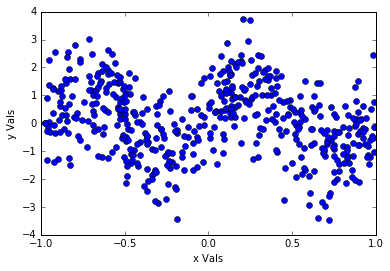

___Base Stochastic Gradient Descent___
Plot colour: red
At 4.0 seconds and 884 iterations, the TOL is 0.665744
At 8.0021 seconds and 1788 iterations, the TOL is 0.672153
At 12.0027 seconds and 2693 iterations, the TOL is 0.660407
At 16.0011 seconds and 3596 iterations, the TOL is 0.686226
At 20.0031 seconds and 4512 iterations, the TOL is 0.659435
Optimal optimisation at n = 4474 of TOL: 0.5798
20.0551 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 4.0008 seconds and 892 iterations, the TOL is 0.663087
At 8.0039 seconds and 1786 iterations, the TOL is 0.670581
At 12.0012 seconds and 2692 iterations, the TOL is 0.671096
At 16.0014 seconds and 3581 iterations, the TOL is 0.942331
At 20.0027 seconds and 4463 iterations, the TOL is 0.690868
Optimal optimisation at n = 4456 of TOL: 0.609723
The % Training TOL increase: -5.1609%
Test set TOL is: 0.53431
The % Test TOL increase: -8.5845%
20.0113 seconds to train

___SGD w.

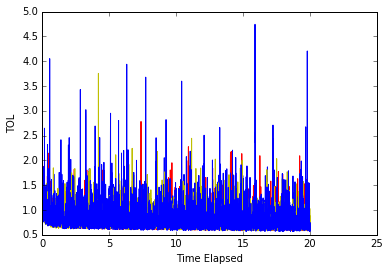

In [22]:
def f(x):
    return np.sin(2*np.pi*(x))
    #return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))

optMethodAnalysis(f, [-1,1],500,10, [0.5,2],20)

Training Data Plot


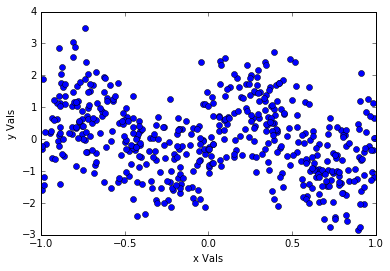

___Base Stochastic Gradient Descent___
Plot colour: red
At 12.0009 seconds and 2686 iterations, the TOL is 0.554087
At 24.0 seconds and 5382 iterations, the TOL is 0.488848
At 36.0014 seconds and 8125 iterations, the TOL is 1.098961
At 48.0038 seconds and 10879 iterations, the TOL is 0.544073
At 60.003 seconds and 13640 iterations, the TOL is 0.501758
Optimal optimisation at n = 13352 of TOL: 0.470565
60.0602 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 12.0018 seconds and 2738 iterations, the TOL is 0.649985
At 24.0031 seconds and 5465 iterations, the TOL is 0.734243
At 36.0017 seconds and 8142 iterations, the TOL is 0.750218
At 48.0011 seconds and 10880 iterations, the TOL is 0.889576
At 60.0007 seconds and 13625 iterations, the TOL is 0.840933
Optimal optimisation at n = 1307 of TOL: 0.500275
The % Training TOL increase: -6.3137%
Test set TOL is: 0.536795
The % Test TOL increase: -10.1799%
60.0131 seconds to tr

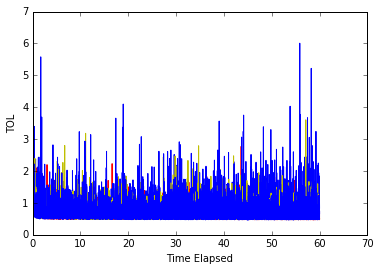

In [23]:
def f(x):
    return np.sin(2*np.pi*(x))
    #return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))

optMethodAnalysis(f, [-1,1],500,10, [0.5,2],60)

Training Data Plot


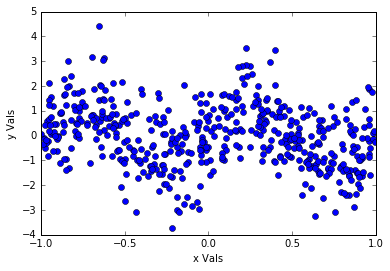

___Base Stochastic Gradient Descent___
Plot colour: red
At 36.0023 seconds and 8237 iterations, the TOL is 0.681556
At 72.0009 seconds and 16419 iterations, the TOL is 0.690924
At 108.0018 seconds and 24719 iterations, the TOL is 0.661472
At 144.0017 seconds and 32912 iterations, the TOL is 0.660249
At 180.0016 seconds and 41224 iterations, the TOL is 0.66485
Optimal optimisation at n = 40832 of TOL: 0.561578
180.0699 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 36.002 seconds and 8151 iterations, the TOL is 0.745255
At 72.003 seconds and 16316 iterations, the TOL is 1.380899
At 108.0009 seconds and 24324 iterations, the TOL is 48.346859
At 144.0019 seconds and 32201 iterations, the TOL is 2678.92441
At 180.0021 seconds and 40377 iterations, the TOL is 180171.555548
Optimal optimisation at n = 1965 of TOL: 0.617452
The % Training TOL increase: -9.9494%
Test set TOL is: 0.599066
The % Test TOL increase: -16.8425%
1

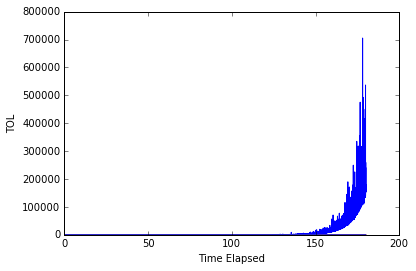

In [24]:
def f(x):
    return np.sin(2*np.pi*(x))
    #return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))

optMethodAnalysis(f, [-1,1],500,10, [0.5,2],180)

Training Data Plot


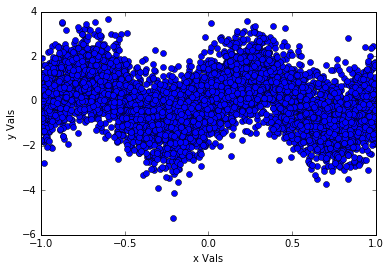

___Base Stochastic Gradient Descent___
Plot colour: red
At 4.0045 seconds and 103 iterations, the TOL is 1.144015
At 8.0228 seconds and 210 iterations, the TOL is 0.665603
At 12.0374 seconds and 317 iterations, the TOL is 0.600907
At 16.021 seconds and 421 iterations, the TOL is 0.779114
At 20.0204 seconds and 524 iterations, the TOL is 1.280284
Optimal optimisation at n = 472 of TOL: 0.580602
20.114 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 4.0005 seconds and 105 iterations, the TOL is 0.841306
At 8.0002 seconds and 208 iterations, the TOL is 1.015296
At 12.0317 seconds and 317 iterations, the TOL is 0.644869
At 16.021 seconds and 421 iterations, the TOL is 0.584941
At 20.0029 seconds and 526 iterations, the TOL is 0.686964
Optimal optimisation at n = 510 of TOL: 0.584658
The % Training TOL increase: -0.6987%
Test set TOL is: 0.58089
The % Test TOL increase: 0.5228%
20.0479 seconds to train

___SGD w. Brownian

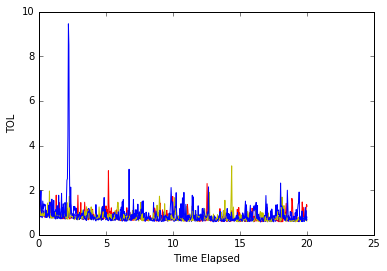

In [25]:
def f(x):
    return np.sin(2*np.pi*(x))
    #return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))

optMethodAnalysis(f, [-1,1],5000,10, [0.5,2],20)

Training Data Plot


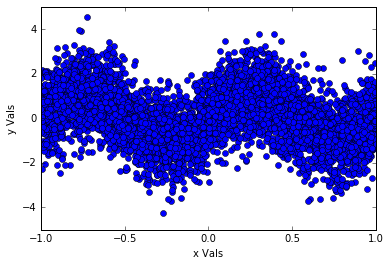

___Base Stochastic Gradient Descent___
Plot colour: red
At 12.0349 seconds and 325 iterations, the TOL is 0.688476
At 24.0355 seconds and 649 iterations, the TOL is 0.746005
At 36.0144 seconds and 973 iterations, the TOL is 0.645935
At 48.0291 seconds and 1296 iterations, the TOL is 0.641788
At 60.0021 seconds and 1618 iterations, the TOL is 0.746995
Optimal optimisation at n = 1583 of TOL: 0.553125
60.0936 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 12.0184 seconds and 328 iterations, the TOL is 0.621113
At 24.0238 seconds and 648 iterations, the TOL is 1.497867
At 36.0135 seconds and 972 iterations, the TOL is 0.65275
At 48.0163 seconds and 1297 iterations, the TOL is 0.826103
At 60.0004 seconds and 1621 iterations, the TOL is 0.60616
Optimal optimisation at n = 1403 of TOL: 0.561616
The % Training TOL increase: -1.5351%
Test set TOL is: 0.562099
The % Test TOL increase: -1.3341%
60.0473 seconds to train

___SG

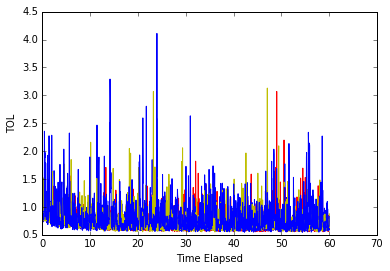

In [26]:
def f(x):
    return np.sin(2*np.pi*(x))
    #return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))

optMethodAnalysis(f, [-1,1],5000,10, [0.5,2],60)

Training Data Plot


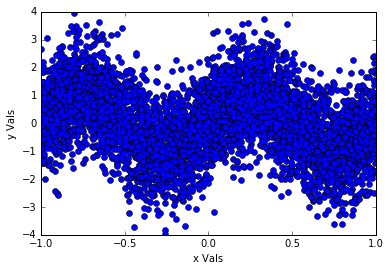

___Base Stochastic Gradient Descent___
Plot colour: red
At 36.0232 seconds and 976 iterations, the TOL is 0.612127
At 72.0 seconds and 1945 iterations, the TOL is 0.994634
At 108.0207 seconds and 2925 iterations, the TOL is 0.734326
At 144.0221 seconds and 3886 iterations, the TOL is 0.575252
At 180.0055 seconds and 4812 iterations, the TOL is 0.551904
Optimal optimisation at n = 4576 of TOL: 0.54566
180.1049 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 36.0206 seconds and 981 iterations, the TOL is 0.676647
At 72.0077 seconds and 1958 iterations, the TOL is 0.672689
At 108.0073 seconds and 2941 iterations, the TOL is 0.650917
At 144.0302 seconds and 3915 iterations, the TOL is 0.666299
At 180.0048 seconds and 4892 iterations, the TOL is 1.197121
Optimal optimisation at n = 1484 of TOL: 0.575414
The % Training TOL increase: -5.4528%
Test set TOL is: 0.569661
The % Test TOL increase: -5.1541%
180.053 seconds to tra

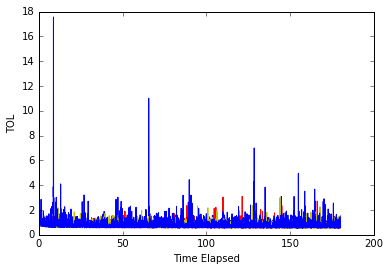

In [27]:
def f(x):
    return np.sin(2*np.pi*(x))
    #return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))

optMethodAnalysis(f, [-1,1],5000,10, [0.5,2],180)

Training Data Plot


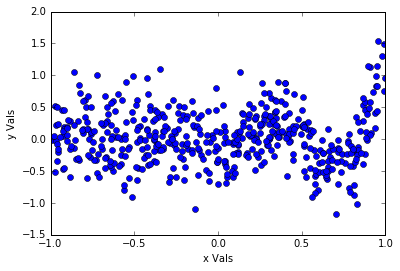

___Base Stochastic Gradient Descent___
Plot colour: red
At 4.0038 seconds and 898 iterations, the TOL is 0.105074
At 8.0013 seconds and 1799 iterations, the TOL is 0.073686
At 12.0019 seconds and 2707 iterations, the TOL is 0.079319
At 16.0004 seconds and 3611 iterations, the TOL is 0.076858
At 20.0017 seconds and 4515 iterations, the TOL is 0.069509
Optimal optimisation at n = 3910 of TOL: 0.067958
20.0534 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 4.0015 seconds and 905 iterations, the TOL is 0.091139
At 8.0018 seconds and 1798 iterations, the TOL is 0.111315
At 12.0041 seconds and 2712 iterations, the TOL is 0.075509
At 16.0006 seconds and 3609 iterations, the TOL is 0.097114
At 20.0034 seconds and 4478 iterations, the TOL is 0.082797
Optimal optimisation at n = 1152 of TOL: 0.069913
The % Training TOL increase: -2.8773%
Test set TOL is: 0.074582
The % Test TOL increase: -4.3101%
20.0117 seconds to train

___

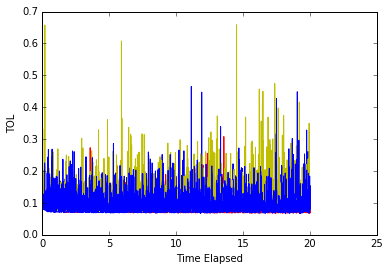

In [29]:
def f(x):
    #return np.sin(2*np.pi*(x))
    return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))


optMethodAnalysis(f, [-1,1],500,10, [0.06,6],20)

Training Data Plot


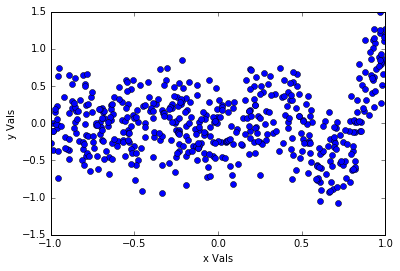

___Base Stochastic Gradient Descent___
Plot colour: red
At 12.0019 seconds and 2716 iterations, the TOL is 0.119853
At 24.0036 seconds and 5460 iterations, the TOL is 0.067101
At 36.0038 seconds and 8224 iterations, the TOL is 0.081751
At 48.0004 seconds and 10958 iterations, the TOL is 0.0792
At 60.0038 seconds and 13709 iterations, the TOL is 0.0783
Optimal optimisation at n = 13194 of TOL: 0.064035
60.0617 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 12.0026 seconds and 2729 iterations, the TOL is 0.07257
At 24.0031 seconds and 5434 iterations, the TOL is 0.08827
At 36.0004 seconds and 8166 iterations, the TOL is 0.150465
At 48.0043 seconds and 10862 iterations, the TOL is 0.590461
At 60.0033 seconds and 13558 iterations, the TOL is 3.376752
Optimal optimisation at n = 950 of TOL: 0.065745
The % Training TOL increase: -2.6716%
Test set TOL is: 0.077309
The % Test TOL increase: -2.9342%
60.0152 seconds to train


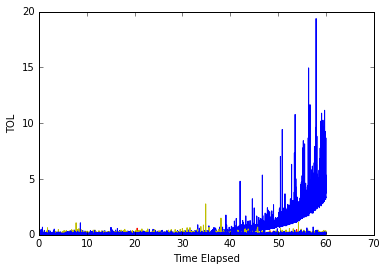

In [30]:
def f(x):
    #return np.sin(2*np.pi*(x))
    return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))


optMethodAnalysis(f, [-1,1],500,10, [0.06,6],60)

Training Data Plot


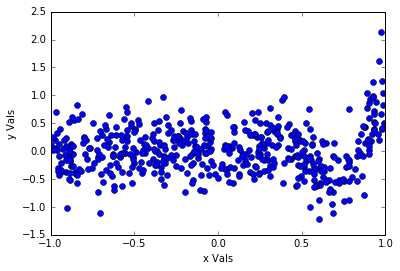

___Base Stochastic Gradient Descent___
Plot colour: red
At 36.0014 seconds and 8256 iterations, the TOL is 0.072298
At 72.0036 seconds and 16574 iterations, the TOL is 0.074856
At 108.0029 seconds and 24849 iterations, the TOL is 0.068229
At 144.0021 seconds and 33056 iterations, the TOL is 0.133505
At 180.0026 seconds and 41330 iterations, the TOL is 0.090321
Optimal optimisation at n = 40880 of TOL: 0.065699
180.0692 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 36.0026 seconds and 8210 iterations, the TOL is 0.100697
At 72.002 seconds and 16428 iterations, the TOL is 11.388403
At 108.0011 seconds and 24556 iterations, the TOL is 3763.325038
At 144.0036 seconds and 32712 iterations, the TOL is 1689989.86373
At 180.0016 seconds and 40887 iterations, the TOL is 632202700.526
Optimal optimisation at n = 1853 of TOL: 0.067629
The % Training TOL increase: -2.9371%
Test set TOL is: 0.07129
The % Test TOL increase: -2.0

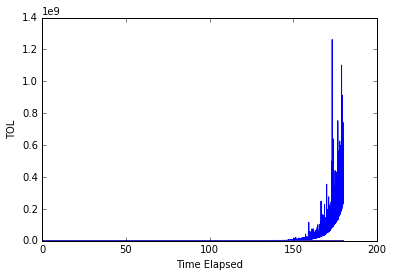

In [31]:
def f(x):
    #return np.sin(2*np.pi*(x))
    return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))


optMethodAnalysis(f, [-1,1],500,10, [0.06,6],180)

Training Data Plot


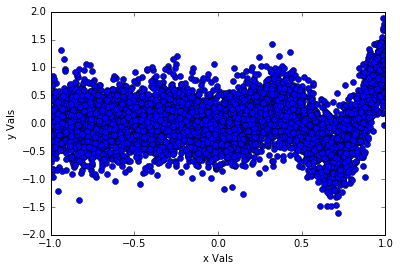

___Base Stochastic Gradient Descent___
Plot colour: red
At 4.0327 seconds and 105 iterations, the TOL is 0.084155
At 8.0053 seconds and 209 iterations, the TOL is 0.082985
At 12.0109 seconds and 312 iterations, the TOL is 0.082221
At 16.0153 seconds and 418 iterations, the TOL is 0.126433
At 20.0352 seconds and 526 iterations, the TOL is 0.163581
Optimal optimisation at n = 502 of TOL: 0.076305
20.1279 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 4.0351 seconds and 107 iterations, the TOL is 0.087348
At 8.015 seconds and 212 iterations, the TOL is 0.080444
At 12.0323 seconds and 318 iterations, the TOL is 0.081415
At 16.0104 seconds and 423 iterations, the TOL is 0.077483
At 20.0334 seconds and 533 iterations, the TOL is 0.085234
Optimal optimisation at n = 470 of TOL: 0.075688
The % Training TOL increase: 0.8076%
Test set TOL is: 0.077099
The % Test TOL increase: 0.9338%
20.0786 seconds to train

___SGD w. Browni

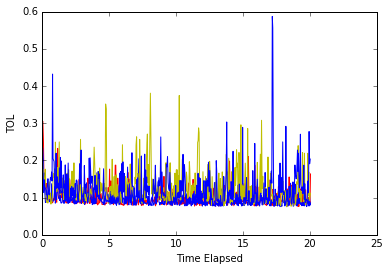

In [32]:
def f(x):
    #return np.sin(2*np.pi*(x))
    return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))


optMethodAnalysis(f, [-1,1],5000,10, [0.06,6],20)

Training Data Plot


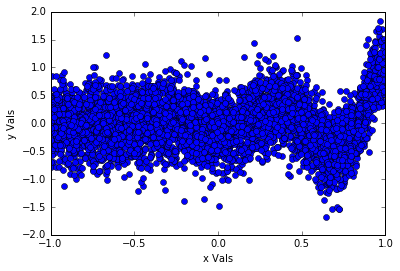

___Base Stochastic Gradient Descent___
Plot colour: red
At 12.0132 seconds and 323 iterations, the TOL is 0.089381
At 24.0027 seconds and 650 iterations, the TOL is 0.092678
At 36.0128 seconds and 969 iterations, the TOL is 0.108501
At 48.0048 seconds and 1289 iterations, the TOL is 0.084045
At 60.0104 seconds and 1608 iterations, the TOL is 0.132273
Optimal optimisation at n = 518 of TOL: 0.074335
60.1004 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 12.0294 seconds and 326 iterations, the TOL is 0.088435
At 24.0059 seconds and 651 iterations, the TOL is 0.099548
At 36.0277 seconds and 977 iterations, the TOL is 0.07889
At 48.0001 seconds and 1302 iterations, the TOL is 0.078817
At 60.0043 seconds and 1629 iterations, the TOL is 0.123111
Optimal optimisation at n = 1421 of TOL: 0.074601
The % Training TOL increase: -0.3582%
Test set TOL is: 0.071748
The % Test TOL increase: -0.1439%
60.0467 seconds to train

___SG

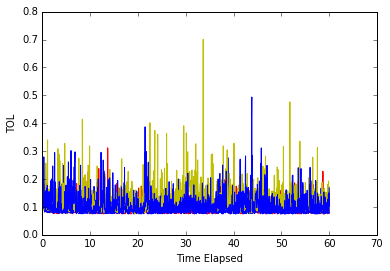

In [33]:
def f(x):
    #return np.sin(2*np.pi*(x))
    return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))


optMethodAnalysis(f, [-1,1],5000,10, [0.06,6],60)

Training Data Plot


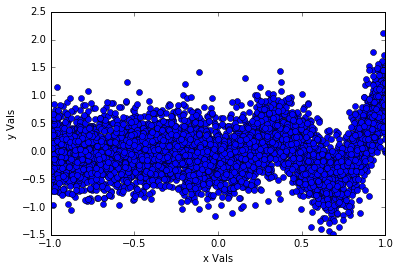

___Base Stochastic Gradient Descent___
Plot colour: red
At 36.0181 seconds and 978 iterations, the TOL is 0.086682
At 72.0337 seconds and 1953 iterations, the TOL is 0.125171
At 108.0258 seconds and 2935 iterations, the TOL is 0.078679
At 144.0339 seconds and 3917 iterations, the TOL is 0.089755
At 180.0089 seconds and 4896 iterations, the TOL is 0.075903
Optimal optimisation at n = 4542 of TOL: 0.071868
180.1059 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 36.0137 seconds and 952 iterations, the TOL is 0.0955
At 72.0201 seconds and 1932 iterations, the TOL is 0.100979
At 108.0196 seconds and 2914 iterations, the TOL is 0.077167
At 144.0353 seconds and 3892 iterations, the TOL is 0.10378
At 180.0282 seconds and 4875 iterations, the TOL is 0.091617
Optimal optimisation at n = 4309 of TOL: 0.071942
The % Training TOL increase: -0.1036%
Test set TOL is: 0.070136
The % Test TOL increase: 0.4388%
180.0735 seconds to tr

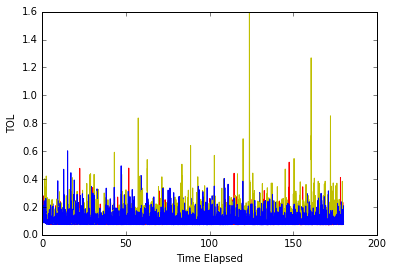

In [34]:
def f(x):
    #return np.sin(2*np.pi*(x))
    return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))


optMethodAnalysis(f, [-1,1],5000,10, [0.06,6],180)

Training Data Plot


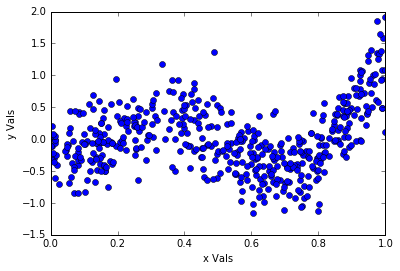

___Base Stochastic Gradient Descent___
Plot colour: red
At 4.0001 seconds and 905 iterations, the TOL is 0.625301
At 8.0003 seconds and 1822 iterations, the TOL is 0.171303
At 12.002 seconds and 2739 iterations, the TOL is 0.413507
At 16.002 seconds and 3656 iterations, the TOL is 0.358588
At 20.0006 seconds and 4578 iterations, the TOL is 0.083707
Optimal optimisation at n = 4428 of TOL: 0.068295
20.053 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 4.0028 seconds and 904 iterations, the TOL is 0.109845
At 8.0033 seconds and 1802 iterations, the TOL is 0.125528
At 12.0034 seconds and 2716 iterations, the TOL is 0.516528
At 16.0011 seconds and 3604 iterations, the TOL is 0.490759
At 20.0011 seconds and 4424 iterations, the TOL is 0.172066
Optimal optimisation at n = 4272 of TOL: 0.069463
The % Training TOL increase: -1.71%
Test set TOL is: 0.076351
The % Test TOL increase: -5.6651%
20.0103 seconds to train

___SGD w

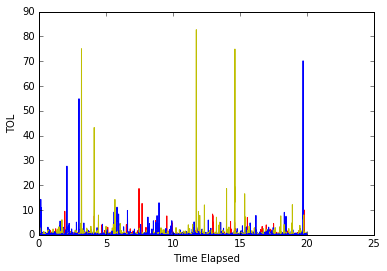

In [35]:
def f(x):
    #return np.sin(2*np.pi*(x))
    return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))


optMethodAnalysis(f, [0,1],500,10, [0.06,6],20)

Training Data Plot


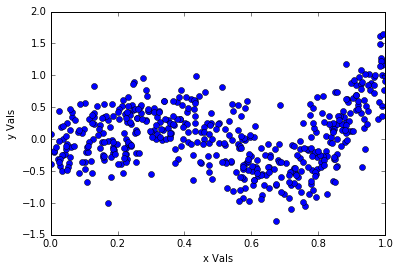

___Base Stochastic Gradient Descent___
Plot colour: red
At 12.0011 seconds and 2789 iterations, the TOL is 0.252885
At 24.004 seconds and 5567 iterations, the TOL is 0.254324
At 36.0036 seconds and 8371 iterations, the TOL is 0.183768
At 48.0006 seconds and 11166 iterations, the TOL is 0.18022
At 60.0007 seconds and 13973 iterations, the TOL is 0.084851
Optimal optimisation at n = 13441 of TOL: 0.064945
60.0587 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 12.0023 seconds and 2787 iterations, the TOL is 0.08311
At 24.001 seconds and 5499 iterations, the TOL is 0.080213
At 36.0018 seconds and 8250 iterations, the TOL is 0.147767
At 48.0 seconds and 11040 iterations, the TOL is 1.75835
At 60.0028 seconds and 13803 iterations, the TOL is 7.42174
Optimal optimisation at n = 5835 of TOL: 0.07429
The % Training TOL increase: -14.3894%
Test set TOL is: 0.076073
The % Test TOL increase: -15.8429%
60.0154 seconds to train



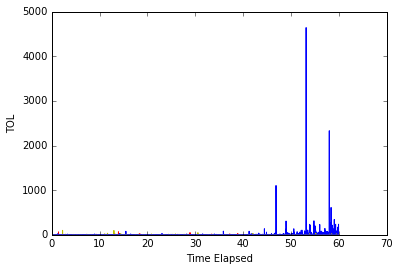

In [36]:
def f(x):
    #return np.sin(2*np.pi*(x))
    return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))


optMethodAnalysis(f, [0,1],500,10, [0.06,6],60)

Training Data Plot


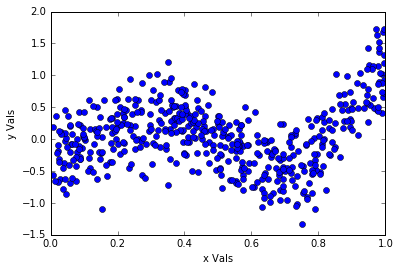

___Base Stochastic Gradient Descent___
Plot colour: red
At 36.0041 seconds and 8382 iterations, the TOL is 0.093844
At 72.0038 seconds and 16738 iterations, the TOL is 0.113584
At 108.0017 seconds and 25037 iterations, the TOL is 0.069971
At 144.0019 seconds and 33443 iterations, the TOL is 0.068579
At 180.0015 seconds and 41884 iterations, the TOL is 0.070817
Optimal optimisation at n = 39115 of TOL: 0.065086
180.0682 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 36.0004 seconds and 8293 iterations, the TOL is 8.787542
At 72.0016 seconds and 16658 iterations, the TOL is 326745.672401
At 108.0019 seconds and 25002 iterations, the TOL is 2343867073.16
At 144.0025 seconds and 33386 iterations, the TOL is 9.45927861247e+13
At 180.0029 seconds and 41727 iterations, the TOL is 2.24290655549e+18
Optimal optimisation at n = 3887 of TOL: 0.072112
The % Training TOL increase: -10.7938%
Test set TOL is: 0.070517
The % Test T

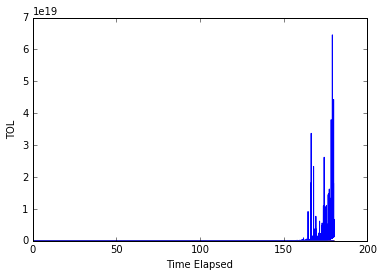

In [37]:
def f(x):
    #return np.sin(2*np.pi*(x))
    return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))


optMethodAnalysis(f, [0,1],500,10, [0.06,6],180)

Training Data Plot


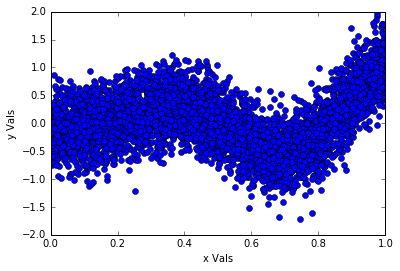

___Base Stochastic Gradient Descent___
Plot colour: red
At 4.0095 seconds and 105 iterations, the TOL is 0.108731
At 8.0148 seconds and 212 iterations, the TOL is 0.087582
At 12.016 seconds and 321 iterations, the TOL is 0.115893
At 16.0259 seconds and 428 iterations, the TOL is 0.113653
At 20.0234 seconds and 537 iterations, the TOL is 0.140128
Optimal optimisation at n = 509 of TOL: 0.078566
20.1168 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 4.0122 seconds and 108 iterations, the TOL is 0.092699
At 8.0311 seconds and 217 iterations, the TOL is 0.33134
At 12.0159 seconds and 324 iterations, the TOL is 0.097601
At 16.011 seconds and 428 iterations, the TOL is 0.098376
At 20.0122 seconds and 537 iterations, the TOL is 0.080057
Optimal optimisation at n = 492 of TOL: 0.078245
The % Training TOL increase: 0.4084%
Test set TOL is: 0.078128
The % Test TOL increase: 0.4306%
20.0522 seconds to train

___SGD w. Brownian

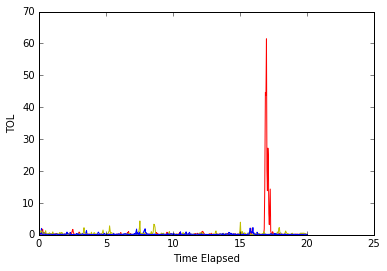

In [38]:
def f(x):
    #return np.sin(2*np.pi*(x))
    return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))


optMethodAnalysis(f, [0,1],5000,10, [0.06,6],20)

Training Data Plot


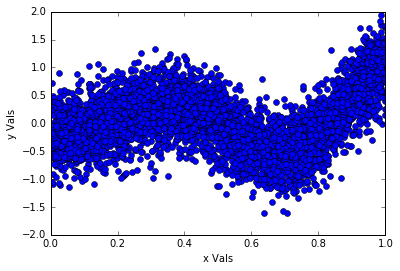

___Base Stochastic Gradient Descent___
Plot colour: red
At 12.0124 seconds and 319 iterations, the TOL is 0.083333
At 24.0248 seconds and 650 iterations, the TOL is 0.842057
At 36.0288 seconds and 980 iterations, the TOL is 0.10191
At 48.0186 seconds and 1296 iterations, the TOL is 0.150879
At 60.0291 seconds and 1617 iterations, the TOL is 0.096068
Optimal optimisation at n = 1560 of TOL: 0.077386
60.1204 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 12.0246 seconds and 330 iterations, the TOL is 0.087004
At 24.0117 seconds and 636 iterations, the TOL is 0.104239
At 36.0207 seconds and 963 iterations, the TOL is 0.267269
At 48.0222 seconds and 1289 iterations, the TOL is 0.506983
At 60.0152 seconds and 1618 iterations, the TOL is 0.109204
Optimal optimisation at n = 1585 of TOL: 0.079463
The % Training TOL increase: -2.6836%
Test set TOL is: 0.080127
The % Test TOL increase: -2.7839%
60.0555 seconds to train

___S

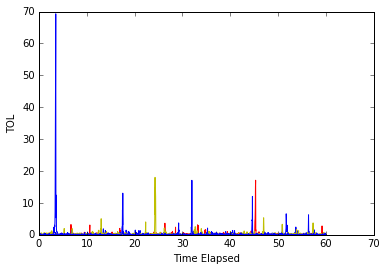

In [39]:
def f(x):
    #return np.sin(2*np.pi*(x))
    return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))


optMethodAnalysis(f, [0,1],5000,10, [0.06,6],60)

Training Data Plot


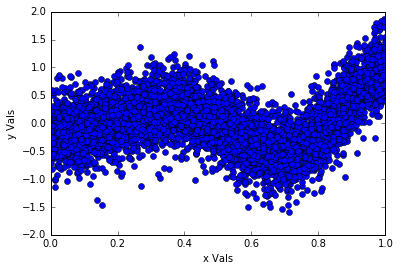

___Base Stochastic Gradient Descent___
Plot colour: red
At 36.0368 seconds and 912 iterations, the TOL is 0.16681
At 72.0179 seconds and 1848 iterations, the TOL is 0.099722
At 108.0219 seconds and 2756 iterations, the TOL is 0.07817
At 144.018 seconds and 3717 iterations, the TOL is 0.082418
At 180.0321 seconds and 4672 iterations, the TOL is 0.174415
Optimal optimisation at n = 4488 of TOL: 0.073256
180.1266 seconds to train

___SGD w. Weight Decay___
Plot colour: blue
We are using a weight decay hyperparam lamda = 0.001
At 36.0001 seconds and 945 iterations, the TOL is 0.14527
At 72.002 seconds and 1908 iterations, the TOL is 0.188014
At 108.0057 seconds and 2862 iterations, the TOL is 0.084971
At 144.0291 seconds and 3839 iterations, the TOL is 0.162177
At 180.0216 seconds and 4765 iterations, the TOL is 0.094734
Optimal optimisation at n = 2629 of TOL: 0.079716
The % Training TOL increase: -8.818%
Test set TOL is: 0.080193
The % Test TOL increase: -8.4746%
180.1023 seconds to trai

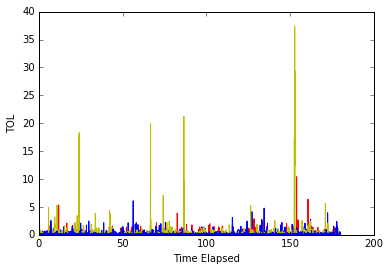

In [40]:
def f(x):
    #return np.sin(2*np.pi*(x))
    return np.cos(3*np.pi*(x-1))*np.exp(2*(x-1))


optMethodAnalysis(f, [0,1],5000,10, [0.06,6],180)